In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import TruncatedSVD

In [70]:
df = pd.read_csv('../creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [71]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df = df.sample(frac=1)  #shuffle

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
241450,0.811849,0.779368,-0.416103,1.442432,1.332867,3.971101,0.335523,2.194741,0.176920,0.485743,...,0.522834,0.248967,1.003180,-0.247951,-0.132305,-0.283054,0.560952,0.595195,0.275871,0
41569,-0.293440,-0.516336,-2.377533,0.520539,-8.094139,8.005351,2.640750,-3.381586,-1.934372,0.562322,...,-0.634747,0.148284,0.721100,2.661291,-0.508620,-0.401657,0.587611,0.500326,0.551760,1
133234,-0.279746,-0.051575,1.315162,0.343059,-0.042491,0.494859,0.051613,-0.588829,0.080015,-0.159254,...,-0.042846,-0.340839,-0.971461,0.023465,-0.491273,0.333517,0.145919,-0.023158,0.022688,0
119714,0.111088,-0.107332,-0.734303,0.435519,-0.530866,-0.471120,0.643214,0.713832,-1.234572,-2.551412,...,0.864536,-1.004877,1.150354,-0.152555,-1.386745,0.004716,0.219146,-0.058257,0.158048,1
70589,3.351778,-0.361318,-2.042608,1.573578,-2.372652,-0.572676,-2.097353,-0.174142,-3.039520,-1.634233,...,0.825566,-0.723326,0.501222,-0.696892,-0.600514,0.127547,-0.786072,0.606097,0.171697,1


In [72]:
mat_df = np.array(new_df).astype(np.float64)

U, s, V = np.linalg.svd(mat_df, full_matrices=True)
U.shape, s.shape, V.shape

((984, 984), (31,), (31, 31))

In [73]:
s

array([546.7001261 , 180.62813769, 155.51413632, 116.42654353,
       108.38994212,  99.02690103,  56.04811538,  48.7466579 ,
        45.60979205,  39.95829418,  38.75012044,  37.14934221,
        35.32826461,  33.83258435,  32.21137493,  31.84140497,
        30.10439691,  29.38977796,  27.05291268,  25.22819072,
        23.43075901,  21.87647886,  20.33940833,  19.90160105,
        17.04591565,  15.91012202,  13.84388127,  11.83789248,
        11.08914386,   9.50880485,   8.96000894])

## TruncatedSVD

In [74]:
svd = TruncatedSVD(n_components=6)
svd.fit(mat_df)

TruncatedSVD(n_components=6)

In [75]:
svd.singular_values_

array([546.7001261 , 180.62813769, 155.51413632, 116.42654353,
       108.38994212,  99.02690103])

In [76]:
svd.explained_variance_ratio_

array([0.65459611, 0.09708981, 0.07288461, 0.04105741, 0.03458768,
       0.03020437])

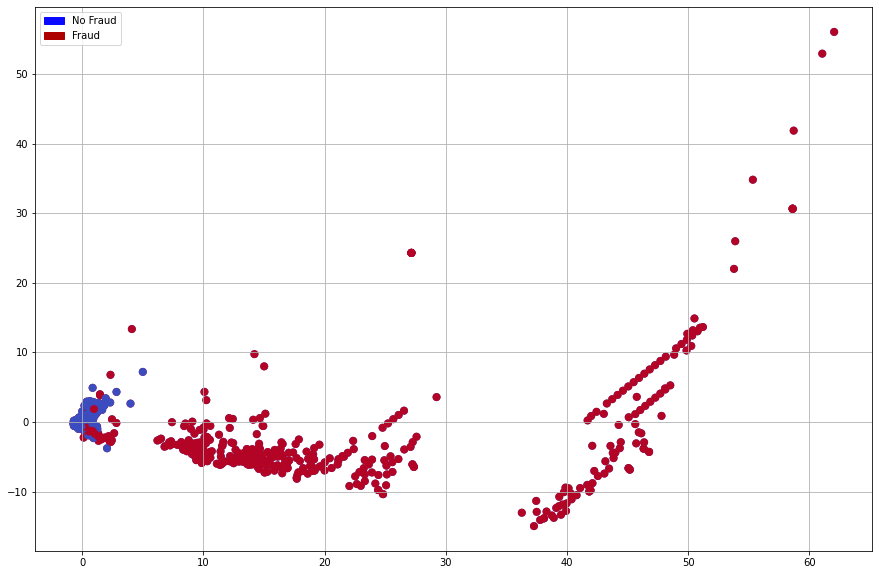

In [77]:
X_reduced_svd6 = TruncatedSVD(n_components=6, algorithm='randomized', random_state=42).fit_transform(mat_df)
y = new_df['Class']

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

plt.figure(figsize=(15,10))
plt.scatter(X_reduced_svd6[:,0], X_reduced_svd6[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
plt.scatter(X_reduced_svd6[:,0], X_reduced_svd6[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
plt.grid(True)
plt.legend(handles=[blue_patch, red_patch])
plt.show()

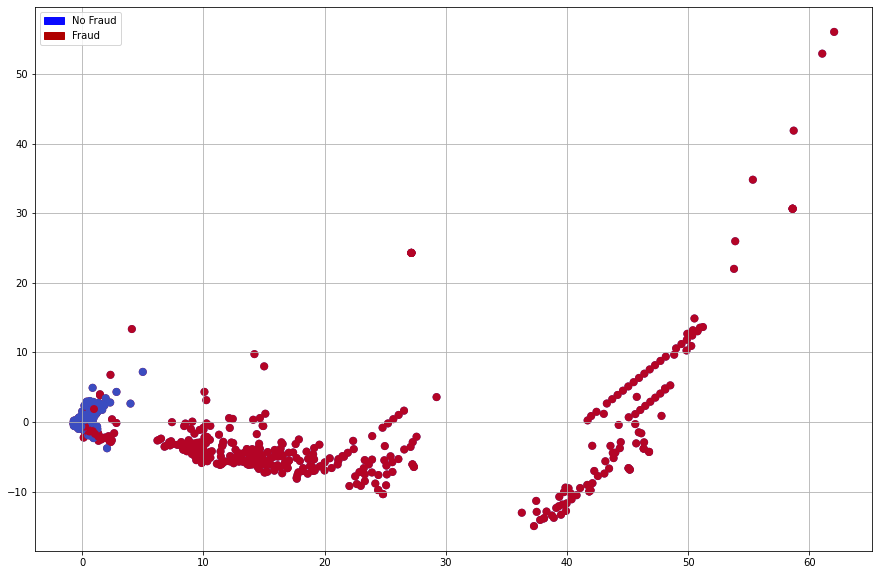

In [78]:
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(mat_df)
y = new_df['Class']

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

plt.figure(figsize=(15,10))
plt.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
plt.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
plt.grid(True)
plt.legend(handles=[blue_patch, red_patch])
plt.show()